In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
%%timeit
samples = np.random.uniform(low=-1.0, high=1.0, size=(2, 100))
min_angles = np.zeros((samples.shape[1]))

for i in range(samples.shape[1]):
    indices = [j for j in range(samples.shape[1]) if not j==i]
    angles = np.zeros(0)
    x = samples[:, i]
    for j in indices:
        y = samples[:, j]
        cosine = np.dot(x,y) / (np.linalg.norm(x) * np.linalg.norm(y))
        angles = np.append(angles, np.arccos(cosine))
    min_angles[i] = np.amin(angles)
        
print('Average minimum angle = ', np.mean(min_angles))

Average minimum angle =  0.0288317312207
Average minimum angle =  0.0345622820908
Average minimum angle =  0.0360423294138
Average minimum angle =  0.0312316669814
Average minimum angle =  0.0340113233875
Average minimum angle =  0.0300539893805
Average minimum angle =  0.0311256745906
Average minimum angle =  0.0231799263962
187 ms ± 7.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [178]:
products = np.dot(samples.T,samples)
products.shape
print(products[3,0])
print(np.dot(samples[:,0], samples[:, 3]))

-0.425953383604
-0.425953383604


In [182]:
%%timeit
samples = np.random.uniform(low=-1.0, high=1.0, size=(2, 100))
dot_products = np.dot(samples.T, samples)
min_angles = np.zeros((samples.shape[1]))

for i in range(samples.shape[1]):
    indices = [j for j in range(samples.shape[1]) if not j==i]
    angles = np.zeros(0)
    x = samples[:, i]
    for j in indices:
        y = samples[:, j]
        cosine = dot_products[i, j] / (np.linalg.norm(x) * np.linalg.norm(y))
        angles = np.append(angles, np.arccos(cosine))
    min_angles[i] = np.amin(angles)
        
print('Average minimum angle = ', np.mean(min_angles))

Average minimum angle =  0.0292303182865
Average minimum angle =  0.0321639986474
Average minimum angle =  0.0256035276965
Average minimum angle =  0.0315630537386
Average minimum angle =  0.0320178047045
Average minimum angle =  0.0325930065106
Average minimum angle =  0.0310732268225
Average minimum angle =  0.0359990527084
189 ms ± 11.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [227]:
%%prun

N_DIMENSIONS = 10
SAMPLESIZE = 100
min_angles = np.zeros(SAMPLESIZE)
max_angles = np.zeros(SAMPLESIZE)
min_avg_angles = np.zeros(N_DIMENSIONS)
max_avg_angles = np.zeros(N_DIMENSIONS)

samples = np.random.uniform(low=-1.0, high=1.0, size=(N_DIMENSIONS, SAMPLESIZE))
for p in range(1, N_DIMENSIONS+1):    
    for i in range(SAMPLESIZE):
        indices = [j for j in range(SAMPLESIZE) if not i==j]
        x = samples[:, i]
        angles = np.zeros(0)
        for j in indices:
            y = samples[:, j]
            cosine = np.dot(x, y) / (np.sqrt((x*x).sum(axis=0)) * np.sqrt((y*y).sum(axis=0)))
            angles = np.append(angles, np.arccos(cosine))
        min_angles[i] = np.amin(angles)
        max_angles[i] = np.amax(angles)    
    min_avg_angles[N_DIMENSIONS-p] = np.mean(min_angles)
    max_avg_angles[N_DIMENSIONS-p] = np.mean(max_angles)
    samples = np.delete(samples, np.s_[-1:], axis=0)

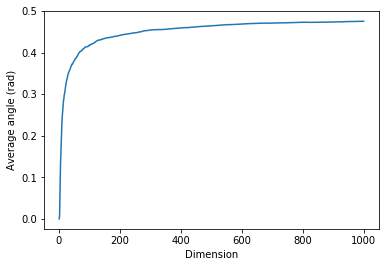

In [167]:
plt.plot(range(1,N_DIMENSIONS+1), min_avg_angles/np.pi)
plt.ylabel('Average angle (rad)')
plt.xlabel('Dimension')
plt.show()

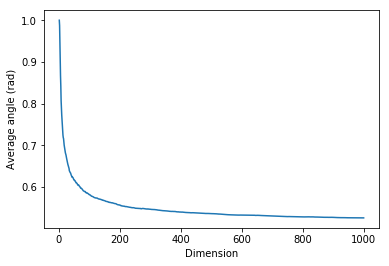

In [168]:
plt.plot(range(1,N_DIMENSIONS+1), max_avg_angles/np.pi)
plt.ylabel('Average angle (rad)')
plt.xlabel('Dimension')
plt.show()

In [197]:
x = np.array([1,2,3,4,5,6,7,8,9])

In [222]:
%%timeit
np.sum(x)

2.51 µs ± 27.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [223]:
%%timeit
x.sum()

1.63 µs ± 27.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [208]:
%%timeit
np.dot(x, x)

792 ns ± 6.04 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [219]:
%%timeit
samples = np.random.uniform(low=-1.0, high=1.0, size=(1000, SAMPLESIZE))

1.16 ms ± 5.71 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [217]:
%%timeit
for i in range(100):
    indices = [j for j in range(samples.shape[1]) if not j==i]

542 µs ± 3.22 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
